<style>
    *{
        text-align: justify;
    }
</style>
<div style='text-align: justify;'>
</div>

# HEURÍSTICA

<div style='text-align: justify;'>
    La busqueda heurística tiene como finalidad la reducción de tiempo y/o espacios, evitando recorrer caminos inútiles que no conducen a una ninguna solución, sin eliminar espacios de estados, por el contrario usar información adicional que guíe el reocrrido a la solución. Con ayuda de la certidumbre nos permitirá resolver problemas a travéz de un conjunto de datos sin tener un camino pre-definido.

Ventajas de la heurística:

<ul>
    <li>Evitan la explosión combinatoria: Crecimiento exponencial en el número de combinaciones posibles a medida que se aumenta el tamaño de un conjunto de datos</li><br>
    <li>Se aproximan a una solución optima</li><br>
    <li>Utiliza una búsqueda informada como conocimiento especifico del problema</li><br>
    <li>Encuentra soluciones de manera más eficiente</li><br>
    <li>Mide el coste estimado más barato desde el nodo inicial hasta el nodo objetivo</li><br>
    <li>Guía el proceso para que en cada movimiento seleccione el estado con el menor coste</li><br>
</ul>
</div>

## Ascención a la cima o gradiente

<div style='text-align: justify;'>
Este algoritmo se basa en ir recorriendo por nivel los nodos hijos con valores más pequeños.
En este caso utilizaré un algoritmo en el que las aristas tengan un valor para no perjudicar o tener que modificar el estado dentro el nodo.
</div>

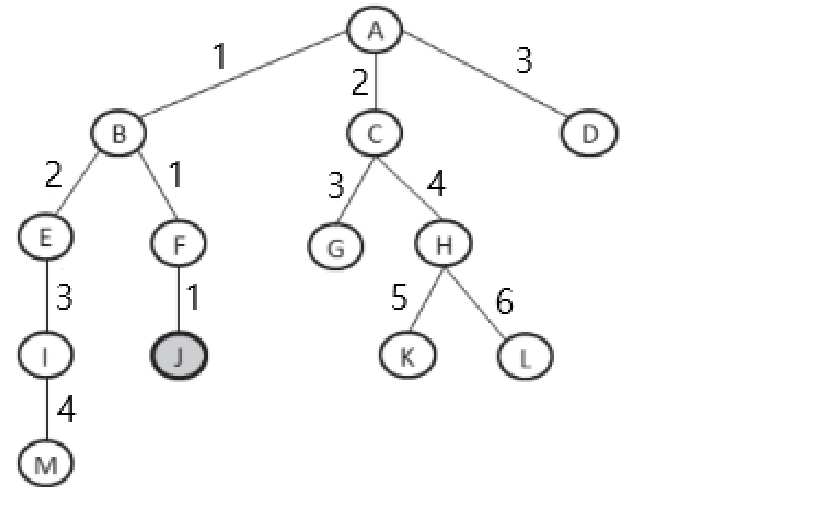

<div style='text-align: justify;'>
Como pueden ver ahora tendré que agregar pesos para poder realizar este algoritmo de heuristica.
Para empezar con este modelo se deben tener en cuenta los siguientes puntos:
<ul>
    <li>El recorrido se hará de acuerdo a la arista que tenga menos peso desde un nodo raiz hasta un nodo hijo</li>
    <li>Si después de recorrer el camino con menor coste, no encuentra el objetivo, se regresará al nodo raíz y de los nodos restantes seleccionará el de menor coste</li>
    <li>Si aún no encuentra el nodo objetivo después de pasar por el primer y segundo paso, entonces se irá moviendo el nodo raíz conforme al nivel que se encuentre</li>
    <li>Repetir los pasos</li>
</ul>
Para que quede más claro nos guiaremos por la siguiente imagen y se explicarán sus recorridos con cada iteración
</div>

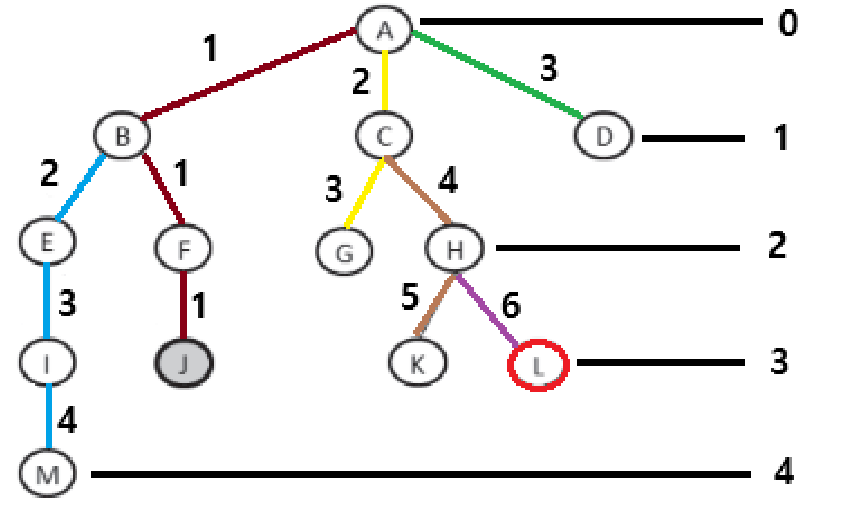

<div style='text-align: justify;'>
    Muy bien, para explicar esto, seguiremos los pasos mensionados anteriormente, teniendo como objetivo llegar al nodo <b>L</b> y a <b>A</b> como nodo raíz. El primer paso dice <b>"El recorrido se hará de acuerdo a la arista que tenga menos peso"</b>, como podemos ver la linea roja es el primer recorrido, el cual sigue el camino con menor costo/peso, llegando hasta el un punto sin salida qué es el nodo <b>J</b>.
    <br><br>
    Como no llegamos al nodo objetivo, seguimos con el siguiente paso <b>"regresará al nodo raíz y de los nodos restantes seleccionará el de menor coste"</b>, por lo que nos debemos regresar al nodo <b>A</b> y volver a elegir entre <b>C</b> y <b>D</b> para el siguiente recorrido, en este caso selecciona <b>C</b> con la linea amarilla y nos lleva hasta el nodo <b>G</b>, que tampoco es el objetivo, volvemos al nodo <b>A</b> ya nomas nos queda <b>D</b> que recorremos la linea verde y al no tener más hijos terminamos el segundo paso.
    <br><br>
    Ya que aún no logramos llegar al nodo objetivo <b>L</b>, toca seguir el siguiente paso <b>"se irá moviendo el nodo raíz conforme al nivel que se encuentre"</b>, si se dan cuenta inicialmente teníamos como nodo raíz el nodo <b>A</b>, siendo este parte del nivel 0, y al ya haber revisado todos sus hijos sercanos, significa que este nodo raíz ya no nos sirve, entonces lo sustituimos por el nodo del siguiente nivel con menor costo, en este caso el nodo <b>B</b>, al cambiar de nodo raíz volvemos a repetir los pasos anteriores y nos lleva por el recorrido de la linea azul.
    <br><br>
    Volvemos a repeter los procesos hasta que nos lleva hasta el nodo <b>L</b>
</div>

A continuación dejo el ejercicio practico del algoritmo en el que pueden ver el movimiento de los nodos

Es importante aclarar que este algoritmo es un poco más complejo que los anteriores por la implementación de pesos y condiciones heurísticas

In [5]:
class Nodo:
    def __init__(self,id):
        self.id = id
        self.visitado = False
        self.visitado2 = False
        self.nivel=-1
        self.neighbor = []

    def getId(self):
        return self.id

    def addNeighbor(self,n):
        if not n in self.neighbor:
            self.neighbor.append(n)

    def __str__(self):
        return self.id

class Arista:
    def __init__(self,peso,n1,n2):
        self.peso = peso
        self.n1 = n1
        self.n2 = n2

    def getPeso(self):
        return self.peso

    def getN1(self):
        return self.n1
    
    def getN2(self):
        return self.n2
    
    def __str__(self):
        return self.peso

class Grafo:
    def __init__(self):
        self.nodos = {}
        self.aristas = {}

    def addNodo(self,n):
        self.nodos[n] = []

    def addArista(self,arista):
        n1 = arista.getN1()
        n2 = arista.getN2()
        if n1 in self.nodos and n2 in self.nodos:
            if (n1, n2) not in self.aristas:
                self.aristas[n1, n2] = []
                self.aristas[n2, n1] = []

            self.nodos[n1].append(n2)
            self.nodos[n2].append(n1)
            self.aristas[n1,n2].append(arista.getPeso())
            self.aristas[n2,n1].append(arista.getPeso())
     
    def verificacion(self,n):
        return n in self.nodos
    
    def getNodo(self,nom):
        for n in self.nodos:
            if n.getId() == nom:
                return n
              
    def getConexNodos(self,n):
        return self.nodos[n]
    
    def AC(self,r,r1,d,cola,x,reco):
        if cola is None:
                cola = [r]       
        y = 0
        vali = False
        vali2 = False
        vali3 = False
        reco += r1.getId()
        if r in self.nodos:
            if(r1 == d):
                print('Objetivo Encontrado: '+d.getId())
                return False, True
            r.visitado = True
            r.nivel = 0
            r1.visitado2 = True
            #print('('+str(r)+', '+str(self.nodos[r].nivel)+')')
            n1 = r1
            if len(self.nodos[n1]) == 1:
                return True,False
            n2Aux = self.nodos[n1]
            aux = [7]
            for n2 in self.nodos[n1]:
                if n2.visitado2 == False:
                    valor = self.aristas[n1,n2]
                    if(valor < aux):
                        aux = valor
                        n2Aux = n2
                    #print('('+str(n1)+') --- '+str(valor)+' --> ('+str(n2)+')')
                    vali = True
            if vali:
                vali = False
                y +=1
                print('('+str(n1)+') --- '+str(aux)+' --> ('+str(n2Aux)+')')
                vali2, vali3 = self.AC(r,n2Aux,d,cola,x,reco)
                y -=1

                if (vali2 and y != 0) or vali3:
                    return True, True

            else:
                v = True
                while v:
                    x+=1
                    auxR = cola[x]
                    if len(self.nodos[auxR]) == 1:                      
                        if len(cola) == len(self.nodos):
                            return True,False
                    else:
                        r = cola[x]
                        v = False
            
            for n in self.nodos[cola[x]]:
                if n.visitado == False:
                    cola.append(n)
                    n.visitado = True
                    n.nivel +=1
                    vali2, vali3 = self.AC(r,r,d,cola,x,reco)
                    if vali3 and vali2:
                        return True,True
                    elif vali2 and vali3 == False:
                        return True,False
                    else:
                        return False,True
                    #print('('+str(n)+', '+str(self.nodos[n].nivel)+')')
                     
    def __str__(self):
        grafo = ''
        for n1 in self.nodos:
            nodosconc = set()
            for n2 in self.nodos[n1]:
                if n2 not in nodosconc:
                    peso = self.aristas[n1,n2]
                    grafo += '('+n1.getId()+')' + ' ----- '+ str(peso) +' -----> '+ '('+n2.getId()+')\n'
                    nodosconc.add(n2)
        return grafo
    
def main():
    g = Grafo()
    
    for x in 'ABCDEFGHIJKLM':
        g.addNodo(Nodo(x))

    l = ['A','B',1,
        'A','C',2,
        'A','D',3,
        'B','E',2,
        'B','F',1,
        'E','I',3,
        'I','M',4,
        'F','J',1,
        'C','G',3,
        'C','H',4,
        'H','K',5,
        'H','L',6]

    for x in range(0,len(l)-2,3):
        g.addArista(Arista(l[x+2],g.getNodo(l[x]),g.getNodo(l[x+1])))

    g.AC(g.getNodo('A'),g.getNodo('A'), g.getNodo('L'),cola=None,x=0,reco='')


main()

(A) --- [1] --> (B)
(B) --- [1] --> (F)
(F) --- [1] --> (J)
(A) --- [2] --> (C)
(C) --- [3] --> (G)
(A) --- [3] --> (D)
(B) --- [2] --> (E)
(E) --- [3] --> (I)
(I) --- [4] --> (M)
(C) --- [4] --> (H)
(H) --- [5] --> (K)
(H) --- [6] --> (L)
Objetivo Encontrado: L


## Primero el Mejor

Este algoritmo Funciona exactamente igual que el algoritmo de busqueda por profundidad, la unica diferencia es que se aplican pesos a las a aristas y de igual manera debe tomar como prioridad aquellos caminos con menor peso/coste

In [67]:
class Nodo:
    def __init__(self,id):
        self.id = id
        self.visitado = False
        self.visitado2 = False
        self.padre = None
        self.neighbor = []

    def getId(self):
        return self.id

    def addNeighbor(self,n):
        if not n in self.neighbor:
            self.neighbor.append(n)

    def __str__(self):
        return self.id

class Arista:
    def __init__(self,peso,n1,n2):
        self.peso = peso
        self.n1 = n1
        self.n2 = n2

    def getPeso(self):
        return self.peso

    def getN1(self):
        return self.n1
    
    def getN2(self):
        return self.n2
    
    def __str__(self):
        return self.peso

class Grafo:
    def __init__(self):
        self.nodos = {}
        self.aristas = {}
        self.recoStr = ''
        self.costo = []

    def addNodo(self,n):
        self.nodos[n] = []

    def addArista(self,arista):
        n1 = arista.getN1()
        n2 = arista.getN2()
        if n1 in self.nodos and n2 in self.nodos:
            if (n1, n2) not in self.aristas:
                self.aristas[n1, n2] = []
                self.aristas[n2, n1] = []

            self.nodos[n1].append(n2)
            self.nodos[n2].append(n1)
            self.aristas[n1,n2].append(arista.getPeso())
            self.aristas[n2,n1].append(arista.getPeso())
     
    def verificacion(self,n):
        return n in self.nodos
    
    def getNodo(self,nom):
        for n in self.nodos:
            if n.getId() == nom:
                return n
             
    def getConexNodos(self,n):
        return self.nodos[n]
    
    def PM(self,r,d):
        vali = False
        if r in self.nodos:
            r.visitado = True
            for auxN in self.nodos[r]:
                aux = [7]
                """
                for ele in self.nodos[r]:
                    print(ele, end=' ')
                print('\n')
                """ 
                  
                for n in self.nodos[r]:
                    if n.visitado == False:
                        valor = self.aristas[r,n]
                        if valor < aux:
                            aux = valor
                            auxN = n
                auxN.padre = r  
                auxReco = r.getId()
                #print('r: '+r.getId())
                #print('n: ',auxN)
                self.costo += self.aristas[r,auxN]
                self.recoStr+= auxReco+' -> '
                #print('('+str(r)+', '+str(auxN)+')')
                if auxN == d:
                    self.recoStr += auxN.getId()
                    print('\nDestino Encontrado')
                    print('Recorrido: '+ self.recoStr)
                    print('Costo: '+str(sum(self.costo)))
                    return True
                vali = self.PM(auxN,d)
                if vali:
                    return True

    def __str__(self):
        grafo = ''
        for n1 in self.nodos:
            nodosconc = set()
            for n2 in self.nodos[n1]:
                if n2 not in nodosconc:
                    peso = self.aristas[n1,n2]
                    grafo += '('+n1.getId()+')' + ' ----- '+ str(peso) +' -----> '+ '('+n2.getId()+')\n'
                    nodosconc.add(n2)
        return grafo
    
def main():
    g = Grafo()
    
    for x in 'ABCDEFGHIJKLM':
        g.addNodo(Nodo(x))

    l = ['A','B',1,
        'A','C',2,
        'A','D',3,
        'B','E',2,
        'B','F',1,
        'E','I',3,
        'I','M',4,
        'F','J',1,
        'C','G',3,
        'C','H',4,
        'H','K',5,
        'H','L',6]

    for x in range(0,len(l)-2,3):
        g.addArista(Arista(l[x+2],g.getNodo(l[x]),g.getNodo(l[x+1])))



    g.PM(g.getNodo('A'),g.getNodo('L'))
    
main()


Destino Encontrado
Recorrido: A -> B -> F -> J -> F -> B -> E -> I -> M -> I -> E -> B -> A -> C -> G -> C -> H -> K -> H -> L
Costo: 52


##  Búsqueda Avara.

La Busqueda Avara como su nombre lo dice es un algoritmo de busqueda con la intenión de encontrar todos los caminos posibles que den hasta el nodo objetivo/destino. Basandose en encontrar la mejor ruta con el menor coste posible

In [1]:
class Nodo:
    def __init__(self,id):
        self.id = id
        self.visitado = False
        self.visitado2 = False
        self.padre = None
        self.neighbor = []

    def getId(self):
        return self.id

    def addNeighbor(self,n):
        if not n in self.neighbor:
            self.neighbor.append(n)

    def __str__(self):
        return self.id

class Arista:
    def __init__(self,peso,n1,n2):
        self.peso = peso
        self.n1 = n1
        self.n2 = n2

    def getPeso(self):
        return self.peso

    def getN1(self):
        return self.n1
    
    def getN2(self):
        return self.n2
    
    def __str__(self):
        return self.peso

class Grafo:
    def __init__(self):
        self.nodos = {}
        self.aristas = {}
        self.recoStr = ''
        self.costo = []

    def addNodo(self,n):
        self.nodos[n] = []

    def addArista(self,arista):
        n1 = arista.getN1()
        n2 = arista.getN2()
        if n1 in self.nodos and n2 in self.nodos:
            if (n1, n2) not in self.aristas:
                self.aristas[n1, n2] = []
                self.aristas[n2, n1] = []

            self.nodos[n1].append(n2)
            self.nodos[n2].append(n1)
            self.aristas[n1,n2].append(arista.getPeso())
            self.aristas[n2,n1].append(arista.getPeso())
     
    def verificacion(self,n):
        return n in self.nodos
    
    def getNodo(self,nom):
        for n in self.nodos:
            if n.getId() == nom:
                return n
             
    def getConexNodos(self,n):
        return self.nodos[n]
    
    def Voraz(self, inicio, d):
        cola = []  
        cola.append([inicio])  

        while cola:
            camino = cola.pop(0) 
            r = camino[-1] 

            if r == d:

                caminoStr = ' -> '.join([nodo.getId() for nodo in camino])
                costo_total = sum(self.aristas[camino[i], camino[i + 1]][0] for i in range(len(camino) - 1))

                print('camino: '+caminoStr)
                print('Costo: '+str(costo_total))

            for n in self.nodos[r]:
                if n not in camino:
                    newCamino = list(camino)
                    newCamino.append(n)
                    #print([nodo.getId() for nodo in newCamino])
                    cola.append(newCamino)
                    
                    #print([', '.join([nodo.getId() for nodo in camino]) for camino in cola])
                    #print('------------------------------------------------------------------')


    def __str__(self):
        grafo = ''
        for n1 in self.nodos:
            nodosconc = set()
            for n2 in self.nodos[n1]:
                if n2 not in nodosconc:
                    peso = self.aristas[n1,n2]
                    grafo += '('+n1.getId()+')' + ' ----- '+ str(peso) +' -----> '+ '('+n2.getId()+')\n'
                    nodosconc.add(n2)
        return grafo
    
def main():
    g = Grafo()
    
    for x in 'ABCDEFGHIJKLM':
        g.addNodo(Nodo(x))

    l = ['A','B',1,
        'A','C',2,
        'A','D',3,
        'B','E',2,
        'B','F',1,
        'E','I',3,
        'I','M',4,
        'F','J',1,
        'C','G',3,
        'C','H',4,
        'H','K',5,
        'H','L',6]

    for x in range(0,len(l)-2,3):
        g.addArista(Arista(l[x+2],g.getNodo(l[x]),g.getNodo(l[x+1])))

    g.Voraz(g.getNodo('A'),g.getNodo('L'))
    

main()

camino: A -> C -> H -> L
Costo: 12


## Búsqueda A*

En esta busqueda se utiliza una función creada para evitar que recorra nodos que se alejen del nodo objetivo. La función es la siguiente:<br>
$f(n) = g(n) + h(n)$<br>

+ $g(n)$: Coste para llegar desde un nodo actual al cualquier nodo adyacente a este.<br>
+ $h(n)$: Coste estimado para llegar al nodo objetivo, siendo este el valor desde el nodo actual en linea recta hasta el nodo objetivo.<br>
+ $f(n)$: Coste total estimado del camino para llegar al nodo objetivo a través del nodo adyacente, suma de dos distancías: <b>Real</b> y <b>Heuristica</b>.


Para este caso utilizaremos un grafo con diferentes pesos, como el que tenemos a continuación:


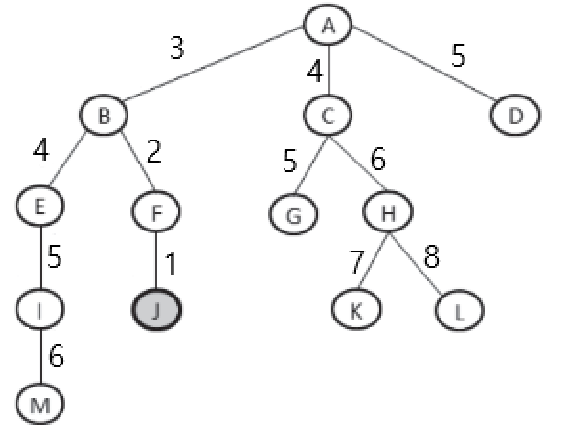

In [2]:
class Nodo:
    def __init__(self,id):
        self.id = id
        self.visitado = False
        self.padre = None
        self.fin = False
        self.costo_estimado = -1
        self.nivel=-1

    def getId(self):
        return self.id

    def getCosto(self):
        return self.costo_estimado

    def addNeighbor(self,n):
        if not n in self.neighbor:
            self.neighbor.append(n)

    def __str__(self):
        return self.id

class Arista:
    def __init__(self,peso,n1,n2):
        self.peso = peso
        self.n1 = n1
        self.n2 = n2

    def getPeso(self):
        return self.peso

    def getN1(self):
        return self.n1
    
    def getN2(self):
        return self.n2
    
    def __str__(self):
        return self.peso

class Grafo:
    def __init__(self):
        self.nodos = {}
        self.aristas = {}
        self.recoStr = ''
        self.costo = []

    def addNodo(self,n):
        self.nodos[n] = []

    def addArista(self,arista):
        n1 = arista.getN1()
        n2 = arista.getN2()
        if n1 in self.nodos and n2 in self.nodos:
            if (n1, n2) not in self.aristas:
                self.aristas[n1, n2] = []
                self.aristas[n2, n1] = []

            self.nodos[n1].append(n2)
            self.nodos[n2].append(n1)
            self.aristas[n1,n2].append(arista.getPeso())
            self.aristas[n2,n1].append(arista.getPeso())
     
    def verificacion(self,n):
        return n in self.nodos
    
    def getNodo(self,nom):
        for n in self.nodos:
            if n.getId() == nom:
                return n
              
    def getConexNodos(self,n):
        return self.nodos[n]

    def Voraz(self, inicio, d):
        cola = []  
        cola.append([inicio])  

        while cola:
            camino = cola.pop(0) 
            r = camino[-1] 

            if r == d:

                caminoStr = ' -> '.join([nodo.getId() for nodo in camino])
                costo_total = sum(self.aristas[camino[i], camino[i + 1]][0] for i in range(len(camino) - 1))
                #print('camino: '+caminoStr)
                #print('Costo: '+str(costo_total))
                return costo_total

            for n in self.nodos[r]:
                if n not in camino:
                    newCamino = list(camino)
                    newCamino.append(n)
                    #print([nodo.getId() for nodo in newCamino])
                    cola.append(newCamino)
                    
                    #print([', '.join([nodo.getId() for nodo in camino]) for camino in cola])
                    #print('------------------------------------------------------------------')

    def costoEstimado(self,d):
        for r in self.nodos:
            r.costo_estimado = self.Voraz(r,d)
            for n in self.nodos:
                n.visitado = False
                n.padre = None
                self.recoStr = ''
                self.costo = []
        """
        print('\n')
        print('------------------------------------\n'*2)
        for r in self.nodos:
            print(r.getId(),r.costo_estimado)
        print('\n')
        """
           
    def getHeuristica(self):
        for n1 in self.nodos:
            nodosconc = set()
            for n2 in self.nodos[n1]:
                if n2 not in nodosconc:
                    peso = int(''.join(map(str,self.aristas[n1,n2])))
                    costo_total = peso + n2.getCosto()
                    #print('('+n1.getId()+')' + ' ----- '+ str(costo_total) +' -----> '+ '('+n2.getId()+')')
                    nodosconc.add(n2)
 
    def Az(self,r,d):
        vali = False
        if (r and d) in self.nodos:
            r.visitado = True
            for auxN in self.nodos[r]:
                aux = float("inf")
                """
                for ele in self.nodos[r]:
                    print(ele, end=' ')
                print('\n')
                """ 
                  
                for n in self.nodos[r]:
                    if n.visitado == False:
                        valor = int(''.join(map(str,self.aristas[r,n])))
                        costo_total = valor + n.getCosto()
                        if costo_total < aux:
                            aux = costo_total
                            auxN = n
                
                auxN.padre = r  
                auxReco = r.getId()
                #print('r: '+r.getId())
                #print('n: ',auxN)
                self.costo += self.aristas[r,auxN]
                self.recoStr+= auxReco+' -> '
                #print('('+str(r)+', '+str(auxN)+')')
                if auxN == d:
                    self.recoStr += auxN.getId()
                    print('\nDestino Encontrado')
                    print('Recorrido: '+ self.recoStr)
                    print('Costo: '+str(sum(self.costo)))
                    return True
                vali = self.Az(auxN,d)
                if vali:
                    return True        
             
    def __str__(self):
        grafo = ''
        for n1 in self.nodos:
            nodosconc = set()
            for n2 in self.nodos[n1]:
                if n2 not in nodosconc:
                    peso = self.aristas[n1,n2]
                    grafo += '('+n1.getId()+')' + ' ----- '+ str(peso) +' -----> '+ '('+n2.getId()+')\n'
                    nodosconc.add(n2)
        return grafo
    
def main():
    g = Grafo()
    
    for x in 'ABCDEFGHIJKLM':
        g.addNodo(Nodo(x))

    l = ['A','B',3,
        'A','C',4,
        'A','D',5,
        'B','E',4,
        'B','F',2,
        'E','I',5,
        'I','M',6,
        'F','J',1,
        'C','G',5,
        'C','H',6,
        'H','K',7,
        'H','L',8]

    for x in range(0,len(l)-2,3):
        g.addArista(Arista(l[x+2],g.getNodo(l[x]),g.getNodo(l[x+1])))
    
    g.costoEstimado(g.getNodo('L'))
    #g.getHeuristica()
    g.Az(g.getNodo('A'),g.getNodo('L'))
    print('\n')

main()


Destino Encontrado
Recorrido: A -> C -> H -> L
Costo: 18




## Algoritmos Genéticos

<div style='text-align: justify;'>
Los Algoritmos Genéticos (AGs), son metodos de adaptación basados en el proceso genetico de los seres vivos, el cual tiene un proceso natural que sigue los principios de <b>selección natural</b> y <b>la supervivencia de los más fuertes</b>.
</div>

<div style='text-align: justify;'>
Estos principios siendo parte de la teoría de Darwin quien explica los siguientes rasgos basicos de como puede cambiar una población:

<ul>
    <li>Los individuos de una población muestran diferencias o variaciones.</li>
    <li>Las variaciones pueden heredarse, lo cual significa que pasan de padre a hijo.</li>
    <li>Los organismos tienen más descendientes de los que pueden sobrevivir con los recursos disponibles.</li>
    <li>Las variaciones que aumentan el éxito reproductivo tendrán mayor oportunidad de transmitirse, que aquellas que no lo aumentan.</li>

###### Rasgos 1.2.5 Selección Natural de: apuntesAlgsGeneticos.pdf
</ul>
</div>



<div style='text-align: justify;'>
La computación evolutiva fue introducida en la decada de 1960 por I.Rechenberg. Sin embargo fue John Holland quien desarrolló la idea de los agloritmos genéticos, propuestos como un método heurístico basado en "La supervivencia del más apto".
<br><br>
Varios investigadores contribuyeron en el estudio de este método, estas aportaciones fueron:
<ul>
    <li><b>Hollands:</b> Introdujo un algoritmo basado en cromosomas, cruzamiento, mutación e inversión. Fue el primero en intentar poner evolución computacional sobre una firme base teórica. Esta fundamentación teórica se basa en la noción de "esquemas", y fue la base de casi todo el trabajo teórico posterior en algoritmos genéticos.</li>
    <li><b>Rechenberg:</b> Estrategias de evolución que comienzan con una "población" de dos individuos, uno de los padres y una descendiencia, la descendencia actúa como una versión mutada de los padres.</li>
    <li><b>Fogel, Owens, y Walsh:</b> El uso de la mutación para proporcionar variaciones.</li>
</ul>
</div>


<div style='text-align: justify;'>
    Los AGs trabajan con una población de individuos, los cuales se les da el propocito de trabajar en encontrar una solución a un problema dado, de forma individual. Para iniciar cada individuo es asignado con un valor/puntuación relacionado con que tanto se acerca a la solución planteada.
    <br><br>
    En la naturaleza esto es equivalente a que tan eficiente es un organizmo para competir con otros recursos en el ambiente, mientras mayor sea la adaptación de este individuo mayor será la probabilidad de ser seleccionado para reproducirse y continuar con la nueva generación. Cuanto menor sea la adaptación del individuo, menor será la probabilidad de ser seleccionado para la reproducción de la siguiente generación
    <br><br>
    De esta manera empieza una nueva población en el que se esperan mejores soluciones que la anterior. Así, a lo largo de las generaciones se van pasando y consiguiendo mejores caracteristicas que un población anterior, creando individuos mejor adaptados, y por ende la población llegará a una solución optima del problema dado.
    <br><br>
    A continuación se mostrará un ejemplo llamado Algoritmo Genético Simple o Algoritmo Genético Canónico.
</div>

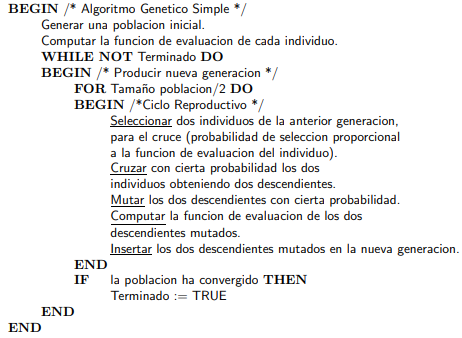<br>
###### Captura: 2. El Algoritmo Genético Simple de temageneticos.dvi - Figura 6.1: Pseudocódigo del Algoritmo Gen´etico Simple

### Funcionamiento

<div style='text-align: justify;'>
    Cada individuo es visto como <b>una posible solución al problema</b>, los cuales son representados como un conjunto de parametros <b>denominados genes</b>, estos siendo agrupados en una lista de valores <b>conocidos como cromosomas</b>. Es importante señalar que el alfabeto en el que se riga estos cromosomas está constituido por: <b>{0,1}</b>
    <br><br>
    Estos conjuntos de parámetros que representan un cromosoma se denominan <b>fenotipo</b>. Con el fenotipo se construye un organismo llamado <b>genotipo</b>, con esto podemos crear la función de adaptación que dependa de un cromosoma, teniendo un numero real que se refleje en el individuo representado por el <b>cromosoma</b>.
    
</div>

### Implementación

In [48]:
import numpy as np
import random as rd

class DNA():
    def __init__(self, target, n_individuals, n_selection, mutation_rate, n_generations, verbose = True):
        self.target = target
        self.n_individuals = n_individuals
        self.n_selection = n_selection
        self.mutation_rate = mutation_rate
        self.n_generations = n_generations
        self.verbose = verbose

    def create_individual(self,min=0,max=9):
        individual = [np.random.randint(min,max) for _ in range(len(self.target))]
        return individual

    def create_population(self):
        population = [self.create_individual() for _ in range(self.n_individuals)]
        return population

    def fitness(self, individual):
        fitness = 0
        for _ in range(len(individual)):
            if individual[_] == self.target[_]:
                fitness += 1

        return fitness
    
    def selection(self, population):
        scores = [(self.fitness(_),_) for _ in population]
        scores = [_[1] for _ in sorted(scores)]

        selected = scores[len(scores) - self.n_selection :]

        return selected
    
    def reproduction(self,population,selected):
        point = 0
        father = []

        for x in range(len(population)):
            point = np.random.randint(1, len(self.target) - 1)
            father = rd.sample(selected, 2)

            population[x][:point] = father[0][:point]
            population[x][point:] = father[1][point:]

        return population

    def mutation(self,population):
        for x in range(len(population)):
            if rd.random() <= self.mutation_rate:
                point = rd.randint(1, len(self.target) - 1)
                new_gen = np.random.randint(0,9)

                while new_gen == population[x][point]:
                    new_gen = np.random.randint(0,9)
                
                population[x][point] = new_gen

        return population

    def run_genetic(self):
        gen = 0
        vali = False
        population = self.create_population()
        for x in range(self.n_generations):
            if self.verbose:
                print('-------------------------')
                print('Generación: ',x)
                print('Población',population)
            
            if population[0] == self.target and vali == False:
                gen = x
                vali = True
            selected = self.selection(population)
            population = self.reproduction(population,selected)
            population = self.mutation(population)
        
        print(population[0])
        print('\nGeneración que logró el objetivo:',gen)

    def __str__(self):
        string = ''

        string += str(self.create_individual()) + '\n'
        string += '------------------------------------------------\n'
        string += str(self.create_population()) + '\n'
        #string += str(self.fitness(self.create_individual())) +'\n'
        string += '------------------------------------------------\n'
        string += str(self.selection(self.create_population())) + '\n'
        string += '------------------------------------------------\n'
        string += str(self.reproduction(self.create_population, self.selection(self.create_population)))

        return string

        
def main():
    target = [1,0,0,1,0,1,1]
    model = DNA(target = target, mutation_rate=0.2, n_individuals = 50, n_selection = 5, n_generations=50,verbose=True)
    model.run_genetic()
if __name__ == '__main__':
    main()

-------------------------
Generación:  0
Población [[4, 8, 3, 8, 1, 4, 1], [3, 2, 5, 7, 5, 4, 8], [8, 5, 4, 5, 7, 5, 2], [4, 0, 3, 7, 3, 6, 7], [3, 8, 1, 8, 2, 3, 5], [4, 6, 3, 8, 7, 3, 6], [3, 5, 6, 2, 5, 5, 2], [8, 5, 1, 3, 6, 0, 8], [6, 5, 3, 5, 6, 0, 3], [7, 2, 4, 8, 5, 6, 0], [4, 8, 5, 3, 8, 6, 3], [5, 0, 6, 5, 8, 8, 7], [1, 8, 6, 2, 5, 4, 4], [6, 4, 1, 0, 8, 0, 8], [7, 1, 5, 3, 6, 6, 5], [0, 6, 4, 7, 3, 0, 1], [0, 6, 2, 4, 2, 5, 7], [7, 1, 0, 6, 6, 6, 2], [1, 6, 5, 7, 2, 4, 0], [3, 6, 1, 5, 7, 8, 2], [0, 8, 7, 8, 8, 4, 2], [7, 3, 6, 3, 1, 4, 1], [1, 7, 3, 5, 7, 1, 8], [4, 0, 5, 3, 4, 8, 6], [6, 0, 7, 6, 5, 1, 4], [7, 1, 6, 8, 5, 5, 3], [1, 6, 6, 5, 8, 7, 7], [1, 8, 2, 5, 0, 3, 1], [0, 8, 1, 6, 8, 0, 2], [1, 6, 0, 5, 0, 4, 1], [6, 7, 3, 0, 8, 8, 8], [7, 0, 1, 3, 0, 2, 6], [2, 6, 2, 1, 0, 2, 6], [6, 8, 0, 5, 1, 0, 6], [1, 3, 8, 2, 4, 6, 8], [6, 5, 3, 5, 6, 3, 3], [6, 2, 5, 7, 7, 7, 2], [6, 2, 3, 2, 7, 7, 8], [1, 0, 8, 7, 5, 2, 3], [2, 7, 5, 2, 5, 6, 2], [4, 6, 8, 1, 4, 2, 2], [0, 2